### Entrenamiento para reconocimiento de Rostro con CNN

In [105]:
from skimage.io import imread_collection , concatenate_images
import numpy as np
import matplotlib.pyplot as plt
import copy  as cp
import copy

# path 
folderGretel = 'Data/Gretel/*.jpg'
folderOthers = 'Data/Desconocido/*.jpg'

# load data 
imagesGretel = imread_collection(folderGretel)
imagesOthers = imread_collection(folderOthers) 

# len
nGretel  = len(imagesGretel)
nOthers = len(imagesOthers)

#HACER RANDOM Y PARA NO SESGASR EL MODELO 
#AUMENTAR DATOS A LA CLASE QUE FALTE PARA TENER IGUAL CANTIDAD Y NO DESBALANCEAR EL MODELO 

# union data
images = np.append(imagesGretel, imagesOthers, axis=0)

print("Total de imagenes: ",len(images))

Total de imagenes:  845


(150, 150, 3)


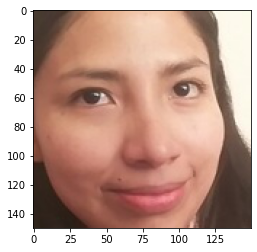

In [106]:
#plot the first image in the dataset
plt.imshow(images[0])
print(images[0].shape)

In [107]:
def Create_Y():
     return [0]*nGretel + [1]*nOthers
Y = Create_Y()

Y = np.array(Y)
X = np.array(images)

(64, 64, 3)


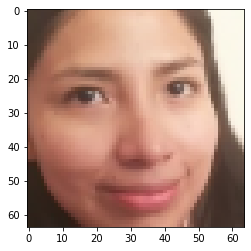

In [108]:
from skimage.transform import resize
X=resize(X,(len(images),64,64,3))

#plot the first image in the dataset
plt.imshow(X[0])
print(X[0].shape)

In [109]:
print(X.shape[1:])

(64, 64, 3)


### Creando la Red Neuronal Convolucional

In [110]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

modelo=Sequential() #Varias capas apiladas entre ellas

modelo.add(Conv2D(200,(3,3),input_shape=X.shape[1:]))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
#La primera capa de CNN seguida por las capas de Relu y MaxPooling

modelo.add(Conv2D(100,(3,3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
#La segunda capa de convolución seguida por las capas de Relu y MaxPooling

modelo.add(Conv2D(50,(3,3)))
modelo.add(Activation('relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))
#La tercera capa de convolución seguida por las capas de Relu y MaxPooling

modelo.add(Flatten()) #Imagen profunda la vamos a hacer plana, es decir solo una dimension,
#va tener toda nuestra informacion de la cnn

modelo.add(Dropout(0.5)) # Apagamos 50% de las neuronas cada paso, asi evitamos sobreajustar
#(evitar un solo camino de entrenamiento)

modelo.add(Dense(50,activation='relu'))
#Capa Densa de 50 neuronas

modelo.add(Dense(2,activation='softmax')) #La capa final softmax con dos salidas para dos categorías
#Softmax nos indica que tanta probabilidad tiene cada clase, y por ende saber cual tiene la maxima probabilidad

modelo.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [111]:
#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Ya que tenemos 2 clases debemos esperar que shape[1] de y_train,y_val y y_test cambie de 0 a 1
Y=to_categorical(Y)

Y[0]

array([1., 0.], dtype=float32)

In [112]:
Y[len(Y)-1]

array([0., 1.], dtype=float32)

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

In [114]:
checkpoint = ModelCheckpoint('CNN/model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [115]:
history=modelo.fit(X_train,Y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2) #,shuffle = True)

Epoch 1/20
15/15 [==============================] - 5s 365ms/step - loss: 0.6766 - accuracy: 0.5699 - val_loss: 0.6164 - val_accuracy: 0.6891
Epoch 2/20
15/15 [==============================] - 5s 351ms/step - loss: 0.6065 - accuracy: 0.6695 - val_loss: 0.5210 - val_accuracy: 0.8235
Epoch 3/20
15/15 [==============================] - 6s 369ms/step - loss: 0.4746 - accuracy: 0.7945 - val_loss: 0.3603 - val_accuracy: 0.8571
Epoch 4/20
15/15 [==============================] - 5s 361ms/step - loss: 0.3568 - accuracy: 0.8411 - val_loss: 0.2754 - val_accuracy: 0.9160
Epoch 5/20
15/15 [==============================] - 6s 374ms/step - loss: 0.2989 - accuracy: 0.8919 - val_loss: 0.1892 - val_accuracy: 0.9328
Epoch 6/20
15/15 [==============================] - 6s 382ms/step - loss: 0.2108 - accuracy: 0.9258 - val_loss: 0.1011 - val_accuracy: 0.9664
Epoch 7/20
15/15 [==============================] - 4s 263ms/step - loss: 0.1574 - accuracy: 0.9449 - val_loss: 0.1164 - val_accuracy: 0.9664
Epoch 

In [116]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## visualización de desempeño

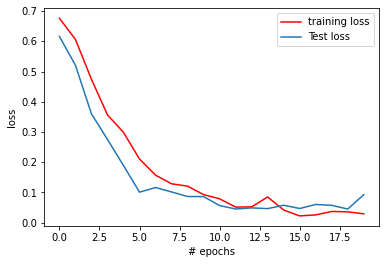

In [117]:

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

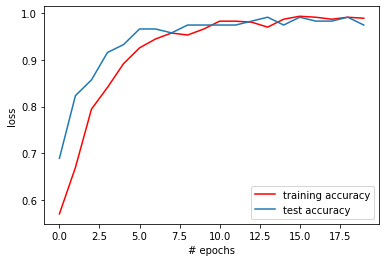

In [118]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [119]:
print(modelo.evaluate(X_test,Y_test))

8/8 [==============================] - 1s 66ms/step - loss: 0.1507 - accuracy: 0.9646
[0.1506877839565277, 0.9645669460296631]


In [120]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#Print Confusion matrix
    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


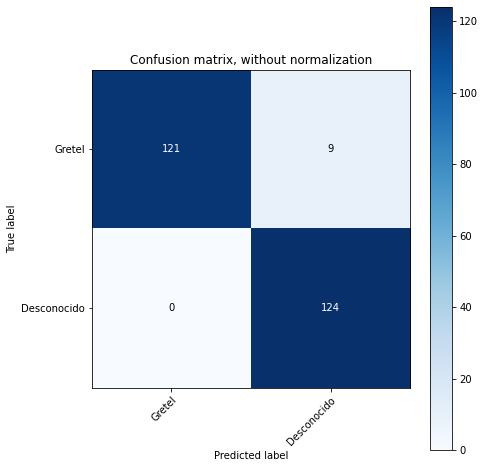

In [123]:
#Making prediction
#train_data,test_data,train_target,test_target

y_pred=modelo.predict_classes(X_test)
y_true=np.argmax(Y_test,axis=1)
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

class_names=['Gretel', 'Desconocido']

# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes = class_names,title = 'Confusion matrix, without normalization')


El puntaje promedio de precisión en la clasificación de los datos de prueba no vistos se obtendrá ahora.

In [122]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.9645669291338582
